# Building on Physics Past
## Lecture 15

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
sp.init_printing(use_latex='mathjax') # pretty printing with LaTeX

In this lecture we will use SymPy and NumPy to solve physics problems taken from first year.  We will then solve more complicated, generalized versions of the problems.

## 1. The bicycle and the truck
A truck is waiting at a red light.  A cyclist trying to catch up is $d=3.00$ m behind the truck just as the light turns green.  The bicycle keeps a constant velocity of $v_b = 20.0$ km/h, while the truck accelerates at a constant rate of $a_t = 3.00$ m/s$^2$.  When does the bicycle catch up to the truck? When does the truck overtake the bicycle?

***Solution***

This is a problem from kinematics. We need to consider the position of bicycle, $x_b$, and the position of truck, $x_t$ as functions of time.

In [2]:
t, d, vb, at = sp.symbols('t, d, v_b, a_t')

Use the kinematic formulae for $x_{b,0} = 0$ and $x_{t, 0} = d$

In [3]:
# bicycle
xb = vb*t
xb

t⋅v_b

In [4]:
# truck
xt = d + at*t**2/2
xt

    2    
aₜ⋅t     
───── + d
  2      

Here are the specific parameters for this problem.

In [5]:
parameters = { d: 3.00, 
               vb: 20.0 * 1000 / 60 / 60,   # convert km/h to m/s
               at: 3.00 }

Plot position of truck and bicycle.

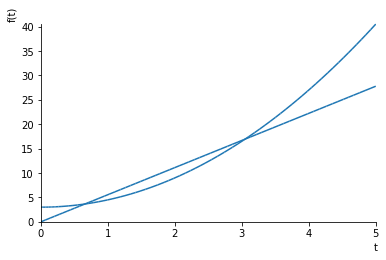

In [6]:
sp.plot(xb.subs(parameters), xt.subs(parameters), (t, 0, 5))
plt.show()

Looks like the bicycle overtakes the truck after about 0.6 s and the truck will overtake the bicycle at around 3 s.  Let's solve for those times exactly when $x_t = x_b$.

In [7]:
soln = sp.solveset(sp.Eq(xt, xb), t)
soln

⎧         ________________           ________________⎫
⎪        ╱              2           ╱              2 ⎪
⎨v_b   ╲╱  -2⋅aₜ⋅d + v_b    v_b   ╲╱  -2⋅aₜ⋅d + v_b  ⎬
⎪─── - ───────────────────, ─── + ───────────────────⎪
⎩ aₜ            aₜ           aₜ            aₜ        ⎭

In [8]:
t1, t2 = soln.subs(parameters)

print(t1.evalf(3), t2.evalf(3)) # pay attention to significant digits

0.656 3.05


The bicycle overtakes the truck after 0.66 s.  The truck overtakes the bicycle after 3.05 s.

## 2. The bicycle and the truck, generalized
A truck is waiting at a red light.  A cyclist trying to catch up is 3.00 m behind the truck just as the light turns green.  The cyclist starts at a velocity of roughly 20 km/h, but can't keep up the pace.  The velocity of the bicylce is given by (4 e$^{-t/3}$ + 2)  m/s, with $t$ measured from the moment the light turns green in seconds, while the truck accelerates at a rate of $(2 - t/10)$  m/s$^2$.  When does the truck overtake the bicycle (answer to 3 sig figs.)?

***Solution***

In [9]:
t = sp.symbols('t')

Velocity of the bicycle

In [10]:
vb = 4 * sp.exp(-t/3) + 2
vb

       -t 
       ───
        3 
2 + 4⋅ℯ   

Acceleration of the truck

In [11]:
at = 2 -  t/10
at

    t 
2 - ──
    10

The kinematic formulae we learn in first-year are only valid for constant velocity or constant accleration. 

Instead, we need to integrate the velocity and acceleration for the bicycle and the truck, respectively.

In [12]:
xb = sp.integrate(vb, (t, 0, t))
xb

               -t 
               ───
                3 
2⋅t + 12 - 12⋅ℯ   

Notice we are integrate with respect to the variable, from time $t=0$ up to an arbitrary time $t=t$.

For the position of the truck, we have to integrate with respect to time twice and set $x_{t,0} = 3.0$.

In [13]:
vt = sp.integrate(at, (t, 0, t))
xt = sp.integrate(vt, (t, 0, t)) + 3
xt

   3         
  t     2    
- ── + t  + 3
  60         

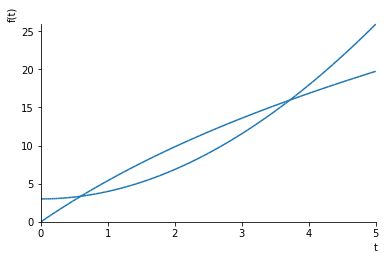

In [14]:
sp.plot(xb, xt, (t, 0, 5))
plt.show()

Looks like truck will overtake the bicycle at around 4 s.  Let's solve for that time exactly.

Let's try an solve for when the bicycle overtakes the truck, and when the truck overtakes the bicycle.

In [15]:
soln = sp.solveset(sp.Eq(xb, xt), t)
soln

⎧                                    -t     ⎫
⎪             3                      ───    ⎪
⎨            t     2                  3     ⎬
⎪t | t ∊ ℂ ∧ ── - t  + 2⋅t + 9 - 12⋅ℯ    = 0⎪
⎩            60                             ⎭

This problem not have nice algebraic solutions so SymPy can't give us symbolic solution. 

SymPy *can* solve equation numerically using `sp.nsolve`. But, it needs an an initial guess for the answer.

In [16]:
t2 = sp.nsolve(sp.Eq(xb, xt), 4)
t2.evalf(3)

3.72

The truck overtakes the bicycle after 3.72 s. If we wanted when the bicycle catches up to the truck, we need use a different initial guess.

In [17]:
t1 = sp.nsolve(sp.Eq(xb, xt), 1)
t1.evalf(3)

0.595

***
Getting $x_b$ and $x_t$ a different way... as ODEs

In [18]:
xb = sp.symbols('x_b', cls=sp.Function)

# velocity is the first derivative of position
ode = sp.Eq(vb, xb(t).diff(t))

# define initial conditions
ics = {xb(t).subs(t,0):0}
        
soln1 = sp.dsolve(ode, ics=ics)
soln1

                        -t 
                        ───
                         3 
x_b(t) = 2⋅t + 12 - 12⋅ℯ   

In [19]:
xt = sp.symbols('x_t', cls=sp.Function)

# acceleration is the second derivative of position
ode = sp.Eq(at, xt(t).diff(t, t))

# define initial conditions
ics = {xt(t).subs(t,0):3,
       xt(t).diff(t).subs(t,0):0}
        
soln2 = sp.dsolve(ode, xt(t), ics=ics)
soln2

           3         
          t     2    
xₜ(t) = - ── + t  + 3
          60         

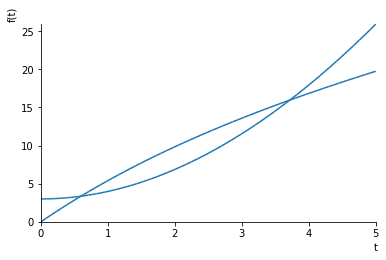

In [20]:
sp.plot(soln1.rhs, soln2.rhs, (t, 0, 5))

## 3. Another ODE: Simple Harmonic Oscillator

Consider a block of mass $m$ attached to a spring on a horizontally frictionless table. Experiments have shown that the force exerted by a spring is linearly proportional to the distance

$$ x $$

the spring is displaced from its equilibrium position. Mathematically, this is

$$ F = -k x $$

where $k$ is the spring constant. Its value depend on the particular spring used. Newton's Second Law then gives

$$ m a = -k x \quad \mathrm{(1)}$$

Since $ a = d^2x / dt^2, this yields the ordinary differential equation

$$ m \frac{d^2 x}{d t^2} = - k x \quad \mathrm{(2)}$$

with the initial conditions

$$ x(0) = x_i, \quad v(0) = v_i $$

where $v$ is the velocity.  In the previous example, acceleration (force) was given an explicit time dependence. Instead, the force here depends on position.  A general solution to (2) was found analytically back in PHYS1050 in terms of sines and cosines, and we can recover it here.

***Solution***

In [29]:
# define our symbols
x = sp.symbols('x', cls=sp.Function)
t = sp.symbols('t')
k, m = sp.symbols('k, m', positive=True)
xi, vi = sp.symbols('x_i, v_i')

In [30]:
# define the differential equation (DE)
ode = sp.Eq(m*x(t).diff(t, t), -k*x(t))
ode

    2                
   d                 
m⋅───(x(t)) = -k⋅x(t)
    2                
  dt                 

In [31]:
# define the initial conditions (ICs)
ics = { x(t).subs(t, 0): xi, 
        x(t).diff(t).subs(t, 0): vi}

In [32]:
soln = sp.dsolve(ode, ics=ics)
soln

                               ⎛√k⋅t⎞
                      √m⋅vᵢ⋅sin⎜────⎟
             ⎛√k⋅t⎞            ⎝ √m ⎠
x(t) = xᵢ⋅cos⎜────⎟ + ───────────────
             ⎝ √m ⎠          √k      

We often rewrite the natural frequency as $ \omega_0 = \sqrt(k)/\sqrt(m)$.

In [33]:
ω0 = sp.symbols('ω_0')

Although this partly works,

In [34]:
soln.subs(sp.sqrt(k)/sp.sqrt(m), ω0)

                      √m⋅vᵢ⋅sin(t⋅ω₀)
x(t) = xᵢ⋅cos(t⋅ω₀) + ───────────────
                             √k      

It turns out that this

In [35]:
soln = soln.subs(sp.sqrt(k), ω0*sp.sqrt(m))
soln

       vᵢ⋅sin(t⋅ω₀)               
x(t) = ──────────── + xᵢ⋅cos(t⋅ω₀)
            ω₀                    

is a better approach.

At this point, $x(t)$ is still an undefined function.

In [36]:
type(x)

sympy.core.function.UndefinedFunction

Now that we have the solution, we can explicit bind the function $x(t)$ to that solution.

In [37]:
x = sp.Lambda(t, soln.rhs)
x

    vᵢ⋅sin(t⋅ω₀)               
t ↦ ──────────── + xᵢ⋅cos(t⋅ω₀)
         ω₀                    

In [38]:
type(x)

sympy.core.function.Lambda

Since there is no dissipation, i.e. no friction, the total mechanical energy of this system should be conserved. Let's check this. The total mechanical energy is the sum of the potential energy $U$ and kinetic energy $K$. The potential energy is given by $( k = \omega_0^2 m)$
    
$$ U = 1/2 k x^2 = 1/2 \omega_0^2 m x^2 $$
    
and the kinetic energy is

$$ K = 1/2 m v^2 $$

In [44]:
U = sp.Rational(1, 2) * ω0**2 * m * x(t)**2
U

                                   2
    2 ⎛vᵢ⋅sin(t⋅ω₀)               ⎞ 
m⋅ω₀ ⋅⎜──────────── + xᵢ⋅cos(t⋅ω₀)⎟ 
      ⎝     ω₀                    ⎠ 
────────────────────────────────────
                 2                  

In [45]:
K = sp.Rational(1,2) * m * sp.diff(x(t), t)**2
K

                                  2
m⋅(vᵢ⋅cos(t⋅ω₀) - xᵢ⋅ω₀⋅sin(t⋅ω₀)) 
───────────────────────────────────
                 2                 

Adding these contributions, we should get a constant.

In [46]:
E = U + K
E

                                   2                                      
    2 ⎛vᵢ⋅sin(t⋅ω₀)               ⎞                                       
m⋅ω₀ ⋅⎜──────────── + xᵢ⋅cos(t⋅ω₀)⎟                                      2
      ⎝     ω₀                    ⎠    m⋅(vᵢ⋅cos(t⋅ω₀) - xᵢ⋅ω₀⋅sin(t⋅ω₀)) 
──────────────────────────────────── + ───────────────────────────────────
                 2                                      2                 

In [47]:
sp.simplify(E)

  ⎛  2     2   2⎞
m⋅⎝vᵢ  + xᵢ ⋅ω₀ ⎠
─────────────────
        2        

as expected.

## 4. Block on an inclined plane

A m = 1.5 kg block rests on a horizontal board hinged at one end.  The coefficient of static friction is μ=0.1.  The free end of the board is lifted very slowly.  At what angle will the block begin to slide down the board?

***Solution***

In [48]:
m, g, μ, θ = sp.symbols('m, g, μ, θ', positive=True)

The component of gravity acting along the board ($r=0$ is at the hinge, $r$ increases up the board):

In [49]:
Fg_radial = - m * g * sp.sin(θ)

The component of gravity acting prependicular to the board:

In [50]:
Fg_normal= - m * g * sp.cos(θ)

Normal force on the block from the board:

In [51]:
Fnormal = - Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [52]:
Fstatic = μ * Fnormal

Find θ at which Fg_radial + Fstatic = 0

In [53]:
soln = sp.solveset(Fg_radial+Fstatic, θ)
soln

⎛    ⎧   ⎛  ⎛           ⎛    ________⎞⎞      ⎛│    ________│⎞⎞        ⎫⎞   ⎛  
⎜    ⎪   ⎜  ⎜           ⎜   ╱ -μ + ⅈ ⎟⎟      ⎜│   ╱ -μ + ⅈ │⎟⎟        ⎪⎟   ⎜  
⎜ℂ ∩ ⎨-ⅈ⋅⎜ⅈ⋅⎜2⋅n⋅π + arg⎜  ╱  ────── ⎟⎟ + log⎜│  ╱  ────── │⎟⎟ | n ∊ ℤ⎬⎟ ∪ ⎜ℂ 
⎜    ⎪   ⎝  ⎝           ⎝╲╱   μ + ⅈ  ⎠⎠      ⎝│╲╱   μ + ⅈ  │⎠⎠        ⎪⎟   ⎜  
⎝    ⎩                                                                ⎭⎠   ⎝  

  ⎧   ⎛  ⎛           ⎛     ________⎞⎞      ⎛│    ___________│⎞⎞        ⎫⎞
  ⎪   ⎜  ⎜           ⎜    ╱ -μ + ⅈ ⎟⎟      ⎜│   ╱ -(μ - ⅈ)  │⎟⎟        ⎪⎟
∩ ⎨-ⅈ⋅⎜ⅈ⋅⎜2⋅n⋅π + arg⎜-  ╱  ────── ⎟⎟ + log⎜│  ╱  ───────── │⎟⎟ | n ∊ ℤ⎬⎟
  ⎪   ⎝  ⎝           ⎝ ╲╱   μ + ⅈ  ⎠⎠      ⎝│╲╱     μ + ⅈ   │⎠⎠        ⎪⎟
  ⎩                                                                    ⎭⎠

The function `sp.solveset` tries to find *all* the possible solutions, but this looks very strange...looking through the documentation it appears SymPy has issues solving some trignometric equations with `sp.solveset`. Perhaps it will be fixed in a future version.

There is a older function solving function called `sp.solve` that does work in this case.

In [55]:
soln = sp.solve(Fg_radial+Fstatic, θ)[0] # pick out the first solution from a list of solutions
soln

      ⎛   ________    ⎞
      ⎜  ╱  2         ⎟
      ⎜╲╱  μ  + 1  - 1⎟
2⋅atan⎜───────────────⎟
      ⎝       μ       ⎠

SymPy seems to doing something interesting with a tangent half-angle formula, since we usually would write the solution as 

$$ \tan^{-1}(\mu) $$

but this is an equivalent solution.


Notice that the $m$ and $g$ have cancelled out, but we need to specify μ to get a number

In [56]:
critical_angle = soln.subs({μ: 0.1})
critical_angle.evalf(3)

0.0997

This is in radians; in degrees it would be

In [57]:
(critical_angle * 180/sp.pi).evalf(3)

5.71

So the block will begin to slide down the board at an angle of 5.71 degrees.

## 5. Block on an rotating inclined plane

A $m=1.5$ kg block rests on a horizontal board hinged at one end.  The block rests 0.3 m away from the hinge (hinge is at r=0).  The coefficient of static friction is μ=0.1.  The free end of the board is lifted so that angle between the board and the horizontal increases at a steady rate of $\omega$=0.4 rad/s.  At what angle will the block begin to slide down the board?

The twist here is that since the board is rotating with a non-negligible speed, the block feels a centrifugal force pushing it away from the hinge (up the board).  Thus, the angle at which it begins to slide should be larger.  The centrifugal force is 

$$F_c = m r ω^2.$$ 

(Alternatively, the force of static friction provides the centripetal acceleration required to keep the block moving in constant circular motion while it as rest with respect to the board.) 

Use $g$=9.81 m/s$^2$.

***Solution***

In [58]:
m, g, θ, μ, ω, r = sp.symbols('m, g, θ, μ, ω, r')

The component of gravity acting along the board ($r$=0 is at the hinge, $r$ increases up the board):

In [59]:
Fg_radial = -m * g * sp.sin(θ)

Centrifugal force:

In [60]:
Fc = m * r * ω**2

The component of gravity acting prependicular to the board:

In [61]:
Fg_normal = -m*g*sp.cos(θ)

Normal force:

In [62]:
Fnormal = -Fg_normal

Maximum upword force (in direction of increasing r) provided by static friction:

In [63]:
Fstatic = μ * Fnormal

Find θ at which Fgradial + Fstat + Fc = 0

In [64]:
Fg_radial+Fstatic+Fc

                                 2
g⋅m⋅μ⋅cos(θ) - g⋅m⋅sin(θ) + m⋅r⋅ω 

In [65]:
soln = sp.solve( Fg_radial + Fstatic + Fc, θ)
soln

⎡       ⎛       ____________________⎞         ⎛       ____________________⎞⎤
⎢       ⎜      ╱  2  2    2    2  4 ⎟         ⎜      ╱  2  2    2    2  4 ⎟⎥
⎢       ⎜g - ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟         ⎜g + ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟⎥
⎢-2⋅atan⎜───────────────────────────⎟, -2⋅atan⎜───────────────────────────⎟⎥
⎢       ⎜                  2        ⎟         ⎜                  2        ⎟⎥
⎣       ⎝         g⋅μ - r⋅ω         ⎠         ⎝         g⋅μ - r⋅ω         ⎠⎦

Picking out the physically meaningful root (a small positive angle) as the critical angle, $\theta_c$.

In [72]:
θc = soln[0]
θc

       ⎛       ____________________⎞
       ⎜      ╱  2  2    2    2  4 ⎟
       ⎜g - ╲╱  g ⋅μ  + g  - r ⋅ω  ⎟
-2⋅atan⎜───────────────────────────⎟
       ⎜                  2        ⎟
       ⎝         g⋅μ - r⋅ω         ⎠

We'll need to specify g, r, ω and μ to get a numerical result.

In [73]:
parameters = { μ:0.1, ω:0.4, r:0.3, g:9.8}

In [74]:
(θc.subs(parameters) * 180 / sp.pi).evalf(3)

5.99

So the block will begin to slide down the board at an angle of 5.99 degrees.

## 6. Moving block on rotating inclined plane

The $m$ = 1.5 kg block from the last example is now on the move.  The coefficient of kinetic friction is $\mu=0.09$.  Plot the position of the block along the board up to $t=1$ s according to the solution of Newton's equation of motion.  When does the block hit the bottom of the board?

The twist here is that since the board is rotating with a non-negligible speed and the block is now moving, so, in addition to the centrifugal force, the block also feels a Coriolis force pushing it into the board.  That Coriolis force is

$$ F_{cor} = 2 m \frac{dr}{dt} \omega$$
    
which pushes into the board increasing the normal force.

***Solution***

In [75]:
m, g, θ, μ, ω, ri = sp.symbols('m, g, θ, μ, ω, r_i')
r = sp.symbols('r', cls=sp.Function)

The component of gravity acting along the board ($r=0$ is at the hinge, $r$ increases up the board):

In [76]:
Fg_radial = -m * g * sp.sin(θ)

(negative since down the board)

Centrifugal force:

In [77]:
Fcen = m * r(t) * ω**2

(positive since up the board)

Coriolis force:

In [78]:
Fcor = -2 * m * r(t).diff(t) * ω

(negative since into the board)

The component of gravity acting prependicular to the board:

In [79]:
Fg_normal = -m * g * sp.cos(θ)

Normal force:

In [80]:
Fnormal = - Fg_normal - Fcor

Force of kinetic friction (should be positive because it tries to keep the block from sliding down)

In [81]:
Fkin = μ * Fnormal

Net force in the r direction

In [82]:
Fnet = Fg_radial + Fkin + Fcen
Fnet

                 2          ⎛                   d       ⎞
-g⋅m⋅sin(θ) + m⋅ω ⋅r(t) + μ⋅⎜g⋅m⋅cos(θ) + 2⋅m⋅ω⋅──(r(t))⎟
                            ⎝                   dt      ⎠

At t=0, the angle is what we found in the last problem, $\theta_c$. 

In [83]:
θ0 = θc.subs({sp.Symbol('r'): ri}) # in the last problem r was a parameter; now it means only the initial position.
θ0

       ⎛       _____________________⎞
       ⎜      ╱  2  2    2     2  4 ⎟
       ⎜g - ╲╱  g ⋅μ  + g  - rᵢ ⋅ω  ⎟
-2⋅atan⎜────────────────────────────⎟
       ⎜                  2         ⎟
       ⎝        g⋅μ - rᵢ⋅ω          ⎠

But now that angle is changing with time with an angular velocity of $\omega$:

In [84]:
Fnet = Fnet.subs( {θ: θ0 + ω*t} )
Fnet

         ⎛            ⎛       _____________________⎞⎞                 ⎛       
         ⎜            ⎜      ╱  2  2    2     2  4 ⎟⎟                 ⎜       
         ⎜            ⎜g - ╲╱  g ⋅μ  + g  - rᵢ ⋅ω  ⎟⎟      2          ⎜       
- g⋅m⋅sin⎜t⋅ω - 2⋅atan⎜────────────────────────────⎟⎟ + m⋅ω ⋅r(t) + μ⋅⎜g⋅m⋅cos
         ⎜            ⎜                  2         ⎟⎟                 ⎜       
         ⎝            ⎝        g⋅μ - rᵢ⋅ω          ⎠⎠                 ⎝       

⎛            ⎛       _____________________⎞⎞                 ⎞
⎜            ⎜      ╱  2  2    2     2  4 ⎟⎟                 ⎟
⎜            ⎜g - ╲╱  g ⋅μ  + g  - rᵢ ⋅ω  ⎟⎟         d       ⎟
⎜t⋅ω - 2⋅atan⎜────────────────────────────⎟⎟ + 2⋅m⋅ω⋅──(r(t))⎟
⎜            ⎜                  2         ⎟⎟         dt      ⎟
⎝            ⎝        g⋅μ - rᵢ⋅ω          ⎠⎠                 ⎠

Notice friction is increased because of the Coriolis force.

Solving Newton's equation of motion

In [85]:
ode = sp.Eq(Fnet,  m * r(t).diff(t, t) )
ics = {r(t).subs(t, 0): ri,
       r(t).diff(t).subs(t,0): 0}

soln = sp.dsolve(ode, r(t), ics=ics)
soln

                 ⎛            ⎛       _____________________⎞⎞          ⎛      
                 ⎜            ⎜      ╱  2  2    2     2  4 ⎟⎟          ⎜      
            2    ⎜            ⎜g - ╲╱  g ⋅μ  + g  - rᵢ ⋅ω  ⎟⎟          ⎜      
         g⋅μ ⋅sin⎜t⋅ω - 2⋅atan⎜────────────────────────────⎟⎟   g⋅μ⋅cos⎜t⋅ω - 
                 ⎜            ⎜                  2         ⎟⎟          ⎜      
                 ⎝            ⎝        g⋅μ - rᵢ⋅ω          ⎠⎠          ⎝      
r(t) = - ──────────────────────────────────────────────────── - ──────────────
                               2 ⎛ 2    ⎞                                     
                            2⋅ω ⋅⎝μ  + 1⎠                                     
                                                                              

      ⎛       _____________________⎞⎞        ⎛            ⎛       ____________
      ⎜      ╱  2  2    2     2  4 ⎟⎟        ⎜            ⎜      ╱  2  2    2 
      ⎜g - ╲╱  g ⋅μ  + g  - rᵢ ⋅ω  ⎟⎟        ⎜     

Yikes! Fill in the physical parameters with numerical values:

In [86]:
parameters = { g:9.81, ω:0.4, μ:0.09, ri: 0.3}
r_soln = soln.subs(parameters)
r_soln

                           0.437616732719144⋅t                                
r(t) = - 13.8918244757567⋅ℯ                    + 30.1636091409582⋅sin(0.4⋅t + 

                                                                              
0.0946314629047015) - 5.47378732268624⋅cos(0.4⋅t + 0.0946314629047015) + 16.79

             -0.365616732719144⋅t
09528080459⋅ℯ                    

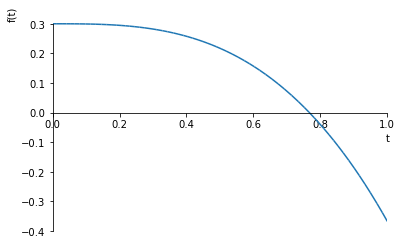

In [87]:
sp.plot(r_soln.rhs, (t, 0, 1))

In [ ]:
t_end = sp.nsolve(r_soln.rhs, t, 0)
t_end.evalf(2)

So the block slides down to the bottom in 0.77 s.

## 7. Collision on a track

Two carts are on a collision course on a frictionless track.  The first cart of mass $m_1$=1.1 kg is moving to the right with $v_1$=0.23 m/s while the second cart of mass $m_2$=0.87 kg is moving to the left at $v_2$=1.3 m/s.  Assuming the collision is elastic, find the velocities of the carts after the collision.

***Solution***

Conservation of momentum

$$ m_1 v_1 + m_2  v_2 = m_1 v_{1f} + m_2 v_{2f} $$

In [88]:
m1, m2, v1i, v1f, v2i, v2f = sp.symbols('m_1, m_2, v_1i, v_1f, v_2i, v_2f')

In Python the = means assignment and the == means equivalent; in SymPy to define a equation, we have to use the `Eq` function to denote equality of two expressions

In [89]:
eq_p = sp.Eq(m1 * v1i + m2 * v2i,  m1*v1f + m2*v2f)
eq_p

m₁⋅v₁ᵢ + m₂⋅v₂ᵢ = m₁⋅v_1f + m₂⋅v_2f

Conservation of energy

In [90]:
eq_e = sp.Eq( m1 * v1i**2/2 + m2 * v2i**2/ 2, m1 * v1f**2/2 + m2 * v2f**2/ 2 )
eq_e

      2         2          2          2
m₁⋅v₁ᵢ    m₂⋅v₂ᵢ    m₁⋅v_1f    m₂⋅v_2f 
─────── + ─────── = ──────── + ────────
   2         2         2          2    

In [91]:
soln =  sp.solve( [eq_p, eq_e], [v1f, v2f], dict=True ) 
soln

⎡                        ⎧                        m₂⋅(2⋅m₁⋅v₁ᵢ - m₁⋅v₂ᵢ + m₂⋅v
⎢                        ⎪      m₁⋅v₁ᵢ + m₂⋅v₂ᵢ - ────────────────────────────
⎢                        ⎨                                    m₁ + m₂         
⎢{v_1f: v₁ᵢ, v_2f: v₂ᵢ}, ⎪v_1f: ──────────────────────────────────────────────
⎣                        ⎩                              m₁                    

₂ᵢ)                                  ⎫⎤
───                                  ⎪⎥
           2⋅m₁⋅v₁ᵢ - m₁⋅v₂ᵢ + m₂⋅v₂ᵢ⎬⎥
───, v_2f: ──────────────────────────⎪⎥
                    m₁ + m₂          ⎭⎦

There are two solutions: the first the carts miss each other entirely. The second solution is the collision.

In [92]:
parameters = { m1:1.1, m2:0.87, v1i:0.23, v2i: -1.3} 
v1f_soln = soln[1][v1f].subs(parameters)
v2f_soln = soln[1][v2f].subs(parameters)

In [93]:
print(f'v_1f = {v1f_soln.evalf(2)}')

v_1f = -1.1


The first cart ends up moving to the left at -1.1 m/s.

In [94]:
print(f'v_2f = {v2f_soln.evalf(2)}')

v_2f = 0.41


The second cart ends up moving to the right at 0.41 m/s.

## 8. Simulating the 1D collision

Suppose the colliding carts in example 7  are equipped with magnets so arranged that the carts feel a repulsive force of magnitude $0.1/d^4$ in newtons, where $d$ is the distance between the carts in metres.  

Let's say the carts start 5 m apart (initially $x_1$=0 and $x_2$=5 metres).  Everything else is as given in example 7.  Use `odeint` from SciPy  to solve Newton's equation and then plot $x_1(t)$, $x_2(t)$, $v_1(t)$ and $v_2(t)$.  Long after the collision, do the final velocities match those given by the answer to example 7?

***Solution***

In [95]:
m1, m2, t, v1i, x1i, v2i, x2i = sp.symbols('m1, m2, t, v1i, x1i, v2i, x2i')
x1, x2 = sp.symbols('x1, x2', cls=sp.Function)

Force on cart1 depends on x1 and x2, and it always points to the left (negative)

In [96]:
F1 = - 0.1 / (x1(t) - x2(t) )**4
F1

     -0.1       
────────────────
               4
(x₁(t) - x₂(t)) 

Equation of motion for cart 1

In [97]:
eq1 = sp.Eq(m1 * x1(t).diff(t, t), F1)
eq1

     2                          
    d                -0.1       
m₁⋅───(x₁(t)) = ────────────────
     2                         4
   dt           (x₁(t) - x₂(t)) 

Information for cart1

In [98]:
cart1 = { m1:1.1, v1i:0.23, x1i:0}

Equation of motion for cart2

Force on cart2 depends on x1 and x2, and it always points to the right (positive).  It's also equal and opposite the force on cart1.

In [99]:
F2 = -F1

In [100]:
eq2 = sp.Eq( m2 * x2(t).diff(t, t), F2)
eq2

     2                          
    d                 0.1       
m₂⋅───(x₂(t)) = ────────────────
     2                         4
   dt           (x₁(t) - x₂(t)) 

Information for cart2

In [101]:
cart2 = { m2:0.87, v2i:-1.3, x2i:5}

Solving Newton's equation

In [102]:
sp.dsolve( [eq1, eq2] ) 

NotImplementedError: 

Looks like SymPy can't do this analytically.  Let's try a numerical solver. In this example, we choose a solver from the SciPy package called `odeint`.

In [103]:
# define initial values
m1 = 1.1;  v1i = 0.23; x1i = 0
m2 = 0.87; v2i = -1.3; x2i = 5

# initial state vector
s0 = [x1i, v1i, x2i, v2i]

def RHS(s, t):
    x1, v1, x2, v2 = s
    return [v1,
            -0.1 / (x1 - x2)**4 / m1,
            v2,
            +0.1 / (x1 - x2)**4 / m2]

tf = 10
t = np.arange(0, tf, 0.1)

from scipy.integrate import odeint
soln = odeint(RHS, s0, t)
x1, v1, x2, v2 = soln.T

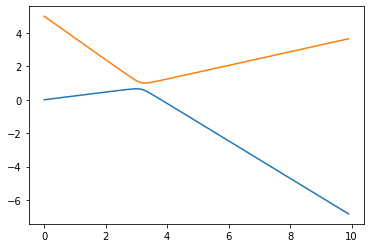

In [104]:
plt.plot(t, x1)
plt.plot(t, x2)

Looks like they "collide" at around 3 s.  Let's plot the velocities.

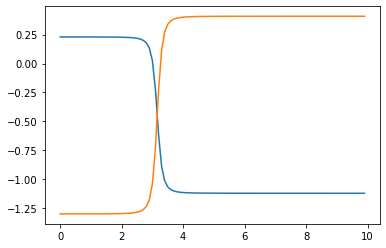

In [105]:
plt.plot(t, v1)
plt.plot(t, v2)

What are the "final" velocities?

In [106]:
print(v1[-1], v2[-1])

-1.1215112013489026 0.40880726607332357


These compare well with -1.1 and 0.41 found in the previous problem.

In [107]:
rel_err1 = abs( (v1[-1] - v1f_soln)/ v1f_soln) * 100
    
rel_err2 = abs( (v2[-1] - v2f_soln) / v2f_soln) * 100

print (rel_err1, rel_err2)

0.0125420604471676 0.0435172875089839


with only small percentage differences.

## 8. Collision in 2D

A block of ice of mass 4.5 kg rests on an ice rink.  Consider the ice rink as the xy-plane with the block at the origin.  A physicist slides another block of ice of mass 8.2 kg with a velocity of 0.3 m/s in the $x$ direction.  After colliding elastically and losing no energy to friction, the y component of the velocity of the physicist's block is 0.05 m/s.  The physicist also notes that the $x$ component of his block doesn't change all that much.  What is the resulting velocity of the smaller block of ice?

#### Solution

In [ ]:
m1, m2, v1xi, v2xi, v1yi, v2yi, v1xf, v2xf, v1yf, v2yf = sp.symbols('m_1, m_2,'
                                                                 'v_1xi, v_2xi, v_1yi, v_2yi,'
                                                                 'v_1xf, v_2xf, v_1yf, v_2yf,')
# there are also more compact ways of declaring many variables at once if need. See the documentation for SymPy.

Conservation of momentum

In [ ]:
eqpx = sp.Eq(m1*v1xi + m2*v2xi, m1*v1xf + m2*v2xf)

eqpy = sp.Eq(m1*v1yi + m2*v2yi, m1*v1yf + m2*v2yf)

In [ ]:
eqpx

In [ ]:
eqpy

Conservation of energy

In [ ]:
eqe = sp.Eq( m1*(v1xi**2+v1yi**2)/2 + m2*(v2xi**2+v2yi**2)/2, 
             m1*(v1xf**2+v1yf**2)/2 + m2*(v2xf**2+v2yf**2)/2 )

eqe

Let's label with "1" quantities associated with the smaller, originally stationary block.
Let's label with "2" quantities associated with the larger, originally moving block (the physicist's block).

In [ ]:
block1 = { m1:4.5, v1xi:0, v1yi:0 }

In [ ]:
block2 = { m2:8.2, v2xi:0.3, v2yi:0, v2yf:0.05 }

In [ ]:
soln = sp.solve( [eqpx,eqpy,eqe], [v1xf,v1yf,v2xf], dict=True )
soln

In [ ]:
len(soln)

In [ ]:
soln[0][v2xf].subs(block1).subs(block2), block2

In [ ]:
soln[1][v2xf].subs(block1).subs(block2), block2

The first solution is the one we want as v2xf ~ v2xi. (The problem stated *The physicist also notes that the 𝑥 component of his block doesn't change all that much.*)

In [ ]:
soln[0][v1xf].subs(block1).subs(block2).evalf(2)

In [ ]:
soln[0][v1yf].subs(block1).subs(block2).evalf(2)

Therefore, the velocity of the originally stationary block is 0.023 m/s in the x direction and 0.091 in the negative y direction.

## 9. Falling rope

A long coiled rope rests at the edge of a platform.  One free end is gently placed 10 cm below the edge of the platform and released.  The rope begins to fall, unwinding as it goes over the edge.  The rope has uniform mass per unit length of $r= 2$ kg/m, and $g$ = 9.8 m/s$^2$.  If the height of the platform is $H=4$ m, find how long it takes for the end of the rope to reach the ground.  Ignore friction.

***Solution***

Here we must use the more general form of Newton's 2nd Law

$$ F = \frac {dp} {dt} = m(t)  y''(t) + m'(t) y'(t) $$

In [108]:
t, r, g, H = sp.symbols('t, r, g, H')
m, y, v = sp.symbols('m, y, v', cls=sp.Function)

In [109]:
dpdt = m(t) * y(t).diff(t, t) + m(t).diff(t) * y(t).diff(t)
dpdt

       2                          
      d          d        d       
m(t)⋅───(y(t)) + ──(m(t))⋅──(y(t))
       2         dt       dt      
     dt                           

Newton's 2nd Law

In [110]:
eqN = sp.Eq(dpdt, -m(t)*g)
eqN

       2                                    
      d          d        d                 
m(t)⋅───(y(t)) + ──(m(t))⋅──(y(t)) = -g⋅m(t)
       2         dt       dt                
     dt                                     

If the rope's end is at $y=y(t)$, then the length of rope dangling over the edge is $H-y(t)$, and the mass of the rope is

In [111]:
eq = eqN.subs( m(t), r*(H - y(t)))
eq

               2                                                    
              d          ∂                d                         
r⋅(H - y(t))⋅───(y(t)) + ──(r⋅(H - y(t)))⋅──(y(t)) = -g⋅r⋅(H - y(t))
               2         ∂t               dt                        
             dt                                                     

SymPy has done the substitution but not evaluated the derivatives.

In [113]:
eq2 = eq.doit()
eq2

               2                     2                  
              d            ⎛d       ⎞                   
r⋅(H - y(t))⋅───(y(t)) - r⋅⎜──(y(t))⎟  = -g⋅r⋅(H - y(t))
               2           ⎝dt      ⎠                   
             dt                                         

Let’s try to see if SymPy can find a general solution to the problem

In [114]:
sp.dsolve(eq2, y(t))

NotImplementedError: solve: Cannot solve g*r*(H - y(t)) + r*(H - y(t))*Derivative(y(t), (t, 2)) - r*Derivative(y(t), t)**2

Again, SymPy does not know now to solve this symbolically. But it can help us set up the problem to solve numerically.

In [115]:
# replace derivative of y(t) with v(t)
eq3 = eq2.subs( y(t).diff(t), v(t))
sp.expand(eq3)

    d             2             d                           
H⋅r⋅──(v(t)) - r⋅v (t) - r⋅y(t)⋅──(v(t)) = -H⋅g⋅r + g⋅r⋅y(t)
    dt                          dt                          

In [116]:
soln = sp.solve(eq3, v(t).diff(t) )
soln

⎡                 2   ⎤
⎢-H⋅g + g⋅y(t) + v (t)⎥
⎢─────────────────────⎥
⎣       H - y(t)      ⎦

We have worked out the derivative of $v(t)$. Let's turn that into a function

In [117]:
F = sp.lambdify([y(t), v(t), H, g], soln[0])

This function, `F(y, v; H, g)`, evaluates the first derivative of $v(t)$. Knowing only the values of $y, v, H,$ and $g$ (but not $t$), we can now compute $dv/dt$.

In [118]:
F(1, 0, 4, 9.81)

-9.81

We can now write the system of equations

$$\begin{align}
\frac{dy}{dt} &= v \\
\frac{dv}{dt} &= F(y, v; H, g)
\end{align}$$

We can numerically solve this system of first order differential equations:

In [119]:
# define initial values
r = 2
H = 4 # m
g = 9.8
yi = H - 0.1 # m
vi = 0.0 # m/s

# Solve the system of ODEs
s0 = [yi, vi]

def RHS(s, t):
    y, v = s
    return [v,
            F(y, v, H, g)]

tf = 2
t = np.arange(0, tf, 0.1)

soln = odeint(RHS, s0, t)
y, v = soln.T

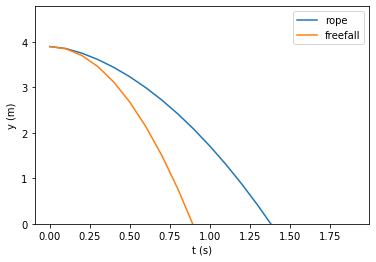

In [120]:
plt.plot(t, y, label='rope')
plt.plot(t, yi - 0.5*g*t**2, label='freefall')
plt.xlabel('t (s)')
plt.ylabel('y (m)')
plt.ylim(ymin = 0)
plt.legend()

Also plotted in the graph is the height of an object falling freely initially alongside the rope end.  The rope falls more slowly.